In [1]:
from model.segmenter import SDHuBERTSegmenter, MincutWrapper
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf
import numpy as np

/home/cheoljun/anaconda3/envs/transformer/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### SD-HuBERT & Mincut

In [49]:
device = "cuda:0"
ckpt_path = "ckpts/sdhubert_base.pt" # or your own path
segmenter = SDHuBERTSegmenter(ckpt_path, layer=9, normcut_strategy="relative",
                              normcut_threshold=0.1, silence_threshold=0.02,
                              device=device)

## syl_dur: asymptotic length of syllable in second. so the below syl_dur=0.1 means it woul have inital 100ms-long syllables.
## merge_threshold: when the similarity of the features of adjacent syllables are above this threshold, they are merged.
mincut = MincutWrapper(syl_dur=0.1, merge_threshold=0.4, ft_sr=50) 

In [50]:
wav_file = 'samples/sample.flac'

In [51]:
outputs = mincut(segmenter(wav_file))

In [52]:
wav,sr = sf.read(wav_file)

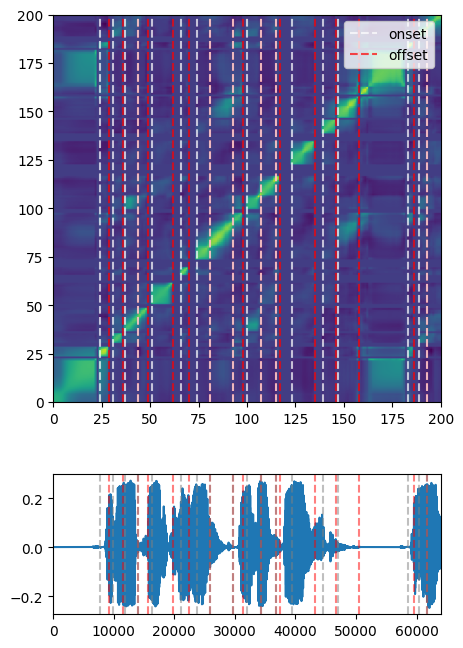

In [59]:
frame_num = 200

f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1],},figsize=(5,8))
a0.imshow(outputs['features']@outputs['features'].T)
need_legend=True
for s,e in outputs['segments']:
    a0.axvline(s, color='white',ls='--',alpha=.7,label='onset')
    a0.axvline(e, color='red', ls='--',alpha=0.7,label='offset')
    if need_legend:
        a0.legend()
        need_legend = False
a0.set_xlim(0,frame_num)
a0.set_ylim(0,frame_num)
a1.plot(wav[:int(sr*200/50)])
a1.set_xlim(0,int(sr*200/50))
for s,e in outputs['segments']:
    a1.axvline(s/50*sr, color='gray',ls='--',alpha=0.5,label='onset')
    a1.axvline(e/50*sr, color='red', ls='--',alpha=0.5,label='offset')